In [1673]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [1675]:
path = 'SQLiV3.csv'
df = pd.read_csv(path, encoding='utf-8')


In [1677]:
print("Data Shape:", df.shape)

Data Shape: (30919, 4)


In [1679]:
df = pd.read_csv("SQLiV3.csv")

In [1681]:
df_cleaned = df.dropna(subset=['Sentence', 'Label'])  # Remove rows where 'Sentence' or 'Label' are NaN
X = df_cleaned['Sentence']  # Features (SQL queries)
y = df_cleaned['Label']     # Labels (SQLi attack or not)


In [1683]:
df.head()

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


In [1685]:
df

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [1687]:
df.isnull().sum()

Sentence         15
Label           255
Unnamed: 2    30613
Unnamed: 3    30910
dtype: int64

In [1689]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
# Fill missing values in the 'Sentence' column with a placeholder
df['Sentence'] = df['Sentence'].fillna('Unknown')

# Fill missing values in the 'Label' column with the mode (most frequent value)
df['Label'] = df['Label'].fillna(df['Label'].mode()[0])
df = df.dropna()




In [1691]:
df.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [1693]:
df.duplicated().sum()

14

In [1695]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30914    False
30915    False
30916    False
30917    False
30918    False
Length: 30919, dtype: bool

In [1697]:
df.drop_duplicates()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,0
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [1699]:
print("Duplicated Rows:")
print(df[df.duplicated()])

Duplicated Rows:
                      Sentence Label
866                     #NAME?     1
13532                   #NAME?     0
14626         1940000000000000     0
15635                   #NAME?     0
17255         1860000000000000     0
17913                   #NAME?     0
18233                   #NAME?     0
18875                   #NAME?     0
18961         7750000000000000     0
19328                      26%     1
19332                      29%     1
19333                      28%     1
19809  SELECT * FROM Customers     0
20033   SELECT * FROM Products     0


In [1701]:
df_cleaned = df.drop_duplicates()

In [1703]:
df_cleaned.to_csv('newcleaned_dataset.csv', index=False)

In [1705]:
print("Cleaned Dataset:")
print(df_cleaned)

Cleaned Dataset:
                                                Sentence Label
0                      " or pg_sleep  (  __TIME__  )  --     1
1      create user name identified by pass123 tempora...     0
2       AND 1  =  utl_inaddr.get_host_address   (    ...     1
3       select * from users where id  =  '1' or @ @1 ...     1
4       select * from users where id  =  1 or 1#"  ( ...     1
...                                                  ...   ...
30914              DELETE FROM door WHERE grow = 'small'     0
30915                               DELETE FROM tomorrow     0
30916                       SELECT wide ( s )  FROM west     0
30917       SELECT * FROM  ( SELECT slide FROM breath )      0
30918                           SELECT TOP 3 * FROM race     0

[30905 rows x 2 columns]


In [1707]:
df=pd.read_csv("newcleaned_dataset.csv")

In [1709]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,0
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [1711]:
df.duplicated().sum()

0

In [1713]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    

Sentence
Unknown                                                                                                                                                                                                                                                                                                            15
1                                                                                                                                                                                                                                                                                                                   3
SELECT * FROM [Brazil Customers]                                                                                                                                                                                                                                                                                    3
SELECT AVG ( Price ) FROM Products                           

In [1715]:
import re

def clean_garbage(df):
    # Define regex patterns to identify garbage values (SQL injection patterns, placeholder strings)
    garbage_patterns = [
        r'\bSELECT\b|\bINSERT\b|\bUPDATE\b|\bDELETE\b|\bDROP\b|\b--\b',  # SQL keywords
        r'select.*pg_sleep',  # SQL sleep injection
        r'1\b',  # Single digit or incomplete values
        r'Unknown',  # Placeholders
        r'exec.*xp_cmdshell',  # Shell execution patterns
        r'\bwaitfor\b.*delay'  # Delayed SQL queries
    ]
    
    # Combine all garbage patterns into a single regex
    garbage_regex = '|'.join(garbage_patterns)
    
    # Apply filtering on 'Sentence' and 'Label' columns
    df = df[~df['Sentence'].str.contains(garbage_regex, na=False)]
    df = df[~df['Label'].str.contains(garbage_regex, na=False)]
    
    # Drop rows where 'Sentence' or 'Label' contains values that are too short (like 1 or 2 characters)
    df = df[df['Sentence'].str.len() > 2]
    df = df[df['Label'].str.len() > 1]
    
    return df

# Apply cleaning
df_cleaned = clean_garbage(df)


In [1717]:
df_cleaned.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [1719]:
df_cleaned.value_counts()

Sentence                      Label                  
&apos                          OR                        1
grant connect to name          grant resource to name    1
x' AND email IS NULL           --                        1
x' AND members.email IS NULL   --                        1
x' AND userid IS NULL          --                        1
x' and email is NULL           --                        1
x' and members.email is NULL   --                        1
x' and userid is NULL          --                        1
Name: count, dtype: int64

In [1721]:
unknown_rows = df[df['Sentence'] == 'Unknown']
print(unknown_rows)


      Sentence                                              Label
64     Unknown   if not  (  select system_user  )   <> 'sa' wa...
140    Unknown        execute immediate 'sel' || 'ect us' || 'er'
183    Unknown                                    exec xp_regread
271    Unknown     exec master..xp_cmdshell 'ping 172.10.1.255'--
301    Unknown                           exec master..xp_cmdshell
319    Unknown   if is_srvrolemember  (  'sysadmin'  )   > 0 w...
356    Unknown                     waitfor delay '0:0:__TIME__'--
397    Unknown              exec   (  'sel' + 'ect us' + 'er'  ) 
454    Unknown   if not   (    (   select serverproperty  (  '...
457    Unknown        exec master..xp_cmdshell 'ping 10.10.1.2'--
459    Unknown   if not   (    (   select serverproperty  (  '...
578    Unknown   begin declare @var varchar  (  8000  )   set ...
671    Unknown                                     or '1'  =  '1'
677    Unknown   begin declare @var varchar  (  8000  )   set ...
19288  Unk

In [1723]:
df = df[df['Sentence'] != 'Unknown']


In [1725]:
unknown_rows = df[df['Sentence'] == 'Unknown']
print(unknown_rows)

Empty DataFrame
Columns: [Sentence, Label]
Index: []


In [1727]:
#descriptive statistics
df.describe().T

,count,unique,top,freq
Sentence,30890,30872,SELECT * FROM [Brazil Customers],3
Label,30890,28,0,19513


In [1729]:
df.describe(include="object")

,Sentence,Label
count,30890,30890
unique,30872,28
top,SELECT * FROM [Brazil Customers],0
freq,3,19513


In [1731]:
import seaborn as sns  # Import Seaborn for data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

In [1733]:
print(df.select_dtypes(include="number").columns)


Index([], dtype='object')


In [1735]:
print(df.dtypes)


Sentence    object
Label       object
dtype: object


In [1737]:
# Example: Convert 'Label' column to numeric (if applicable)
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')


In [1739]:
print(df.select_dtypes(include="number").columns)


Index(['Label'], dtype='object')


In [1741]:
# Convert all text to lowercase and remove special characters
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

df_cleaned['Sentence'] = df_cleaned['Sentence'].apply(clean_text)

In [1743]:
#Split the Data into features (X) and labels (y)
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)

(30890,) (30890,)


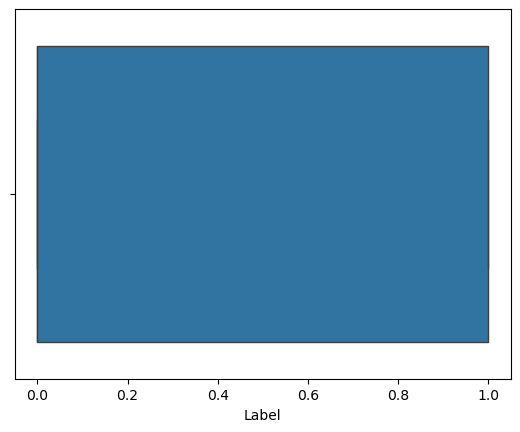

In [1745]:
#Boxplot-to-identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [1747]:
print(df_cleaned.columns)


Index(['Sentence', 'Label'], dtype='object')


In [1749]:
df_cleaned = df.dropna(subset=['Sentence', 'Label']) 

# Convert the 'Label' column to integers (e.g., 0 and 1)
df_cleaned['Label'] = df_cleaned['Label'].astype(float).astype(int)

# Extract features and labels
X = df_cleaned['Sentence']  # Features (SQL queries)
y = df_cleaned['Label']     # Labels (SQLi attack or not)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1) * 100

    # Store results in the dictionary
    results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"F1 Score: {f1:.2f}%")

# Display the results for each model
print("\nSummary of Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.2f}%, F1 Score = {metrics['F1 Score']:.2f}%")


Training Logistic Regression...

Logistic Regression Model Evaluation:
Accuracy: 98.98%
F1 Score: 98.61%

Training Random Forest...

Random Forest Model Evaluation:
Accuracy: 99.47%
F1 Score: 99.27%

Training SVM...

SVM Model Evaluation:
Accuracy: 99.27%
F1 Score: 99.00%

Training Naive Bayes...

Naive Bayes Model Evaluation:
Accuracy: 96.45%
F1 Score: 95.09%

Training Decision Tree...

Decision Tree Model Evaluation:
Accuracy: 99.29%
F1 Score: 99.02%

Summary of Model Performance:
Logistic Regression: Accuracy = 98.98%, F1 Score = 98.61%
Random Forest: Accuracy = 99.47%, F1 Score = 99.27%
SVM: Accuracy = 99.27%, F1 Score = 99.00%
Naive Bayes: Accuracy = 96.45%, F1 Score = 95.09%
Decision Tree: Accuracy = 99.29%, F1 Score = 99.02%


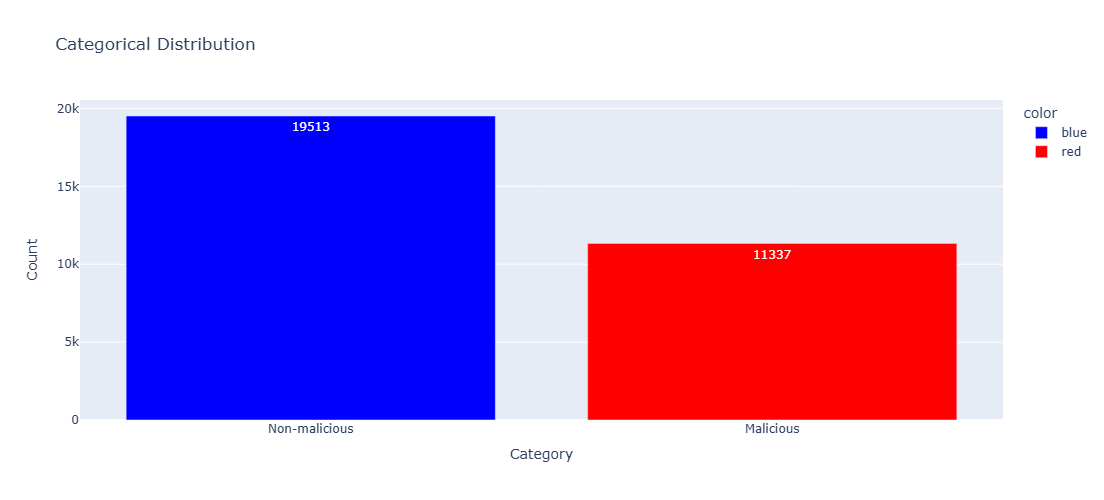

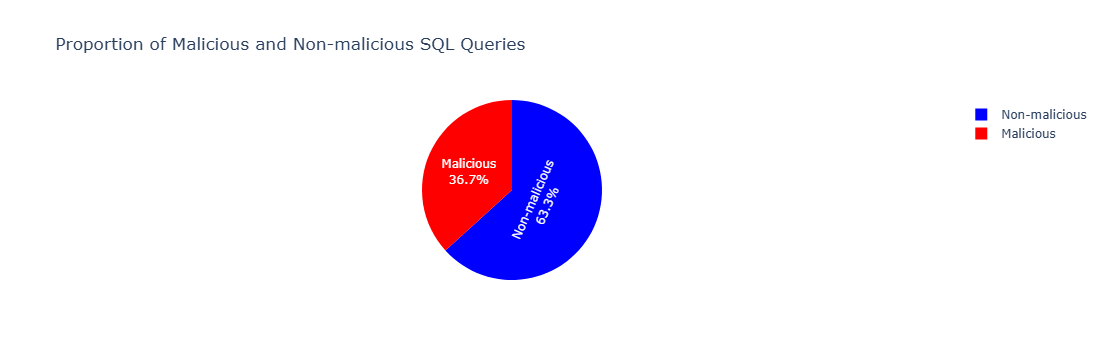

In [1750]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('newcleaned_dataset.csv')

# Clean the dataset by removing invalid Label values
df_cleaned = df[pd.to_numeric(df['Label'], errors='coerce').notnull()]

# Convert Label column to integers
df_cleaned['Label'] = df_cleaned['Label'].astype(int)

# Create a new column for better labeling (0 = Non-malicious, 1 = Malicious)
df_cleaned['Label'] = df_cleaned['Label'].map({0: 'Non-malicious', 1: 'Malicious'})

# Count the number of malicious and non-malicious queries
counts = df_cleaned['Label'].value_counts()

# Create a DataFrame for Plotly
distribution_df = pd.DataFrame({
    'Category': ['Non-malicious', 'Malicious'],
    'Count': counts.values,
    'color': ['blue', 'red']  # Define colors for categories
})

# Bar Chart using Plotly
bar_chart = px.bar(
    distribution_df, 
    x='Category', 
    y='Count', 
    color='color', 
    color_discrete_map={'blue': 'blue', 'red': 'red'},
    title="Categorical Distribution",
    labels={'Category': 'SQL Query Category', 'Count': 'Count'},
    text='Count',  # Display count on bars
    width=900, 
    height=500
)

# Customize the layout
bar_chart.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    showlegend=True,
    legend_title_text='color'
)

# Show the bar chart
bar_chart.show()

# Pie Chart using Plotly
pie_chart = px.pie(
    distribution_df, 
    names='Category', 
    values='Count', 
    color='Category',
    color_discrete_map={'Non-malicious': 'blue', 'Malicious': 'red'},
    title="Proportion of Malicious and Non-malicious SQL Queries",
    hole=0.0  # Full pie chart
)

# Customize the layout and add percentage
pie_chart.update_traces(textinfo='percent+label')

# Show the pie chart
pie_chart.show()

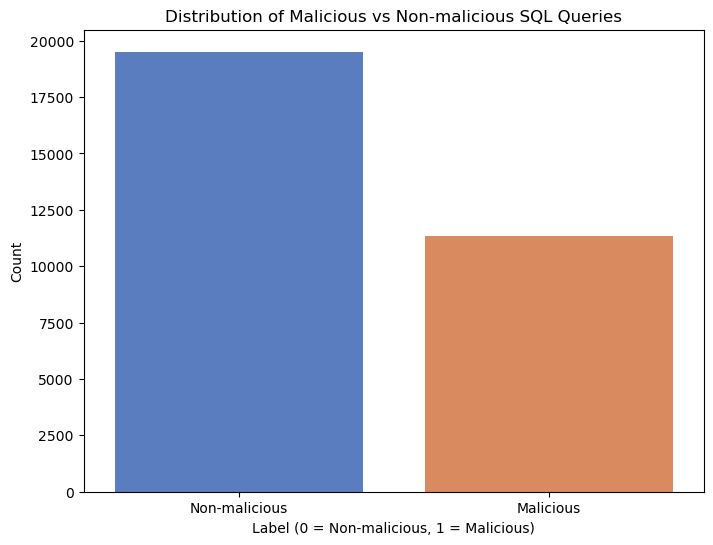

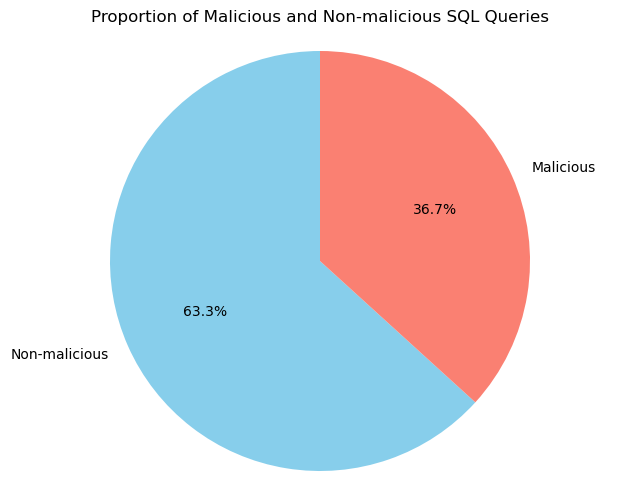

In [1751]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your CSV or appropriate data format
# Adjust file path based on the format (example assumes CSV)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line based on your file format
# Since we cannot load the file directly, I assume you've loaded it as 'df_cleaned'

# Step 2: Count the number of occurrences of malicious and non-malicious queries
label_counts = df_cleaned['Label'].value_counts()

# Step 3: Bar Chart for Distribution of Malicious and Non-malicious Queries
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='muted')
plt.title('Distribution of Malicious vs Non-malicious SQL Queries')
plt.xlabel('Label (0 = Non-malicious, 1 = Malicious)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-malicious', 'Malicious'])
plt.show()

# Step 4: Pie Chart for Distribution of Malicious and Non-malicious Queries
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Non-malicious', 'Malicious'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proportion of Malicious and Non-malicious SQL Queries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
